# Regression - california housing values (Geron ch 2)

## Import data


In [1]:
import os
import tarfile
import urllib
import numpy as np

DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/'
HOUSING_PATH = 'D:\Robert\OneDrive\Documents\Coursework\CQF\Jupyter Notebooks\Playpen\Hands On ML - Geron'
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok = True)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    print("tgz path", tgz_path)
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [2]:
fetch_housing_data()
housing = load_housing_data()

housing.head()

tgz path D:\Robert\OneDrive\Documents\Coursework\CQF\Jupyter Notebooks\Playpen\Hands On ML - Geron\housing.tgz


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


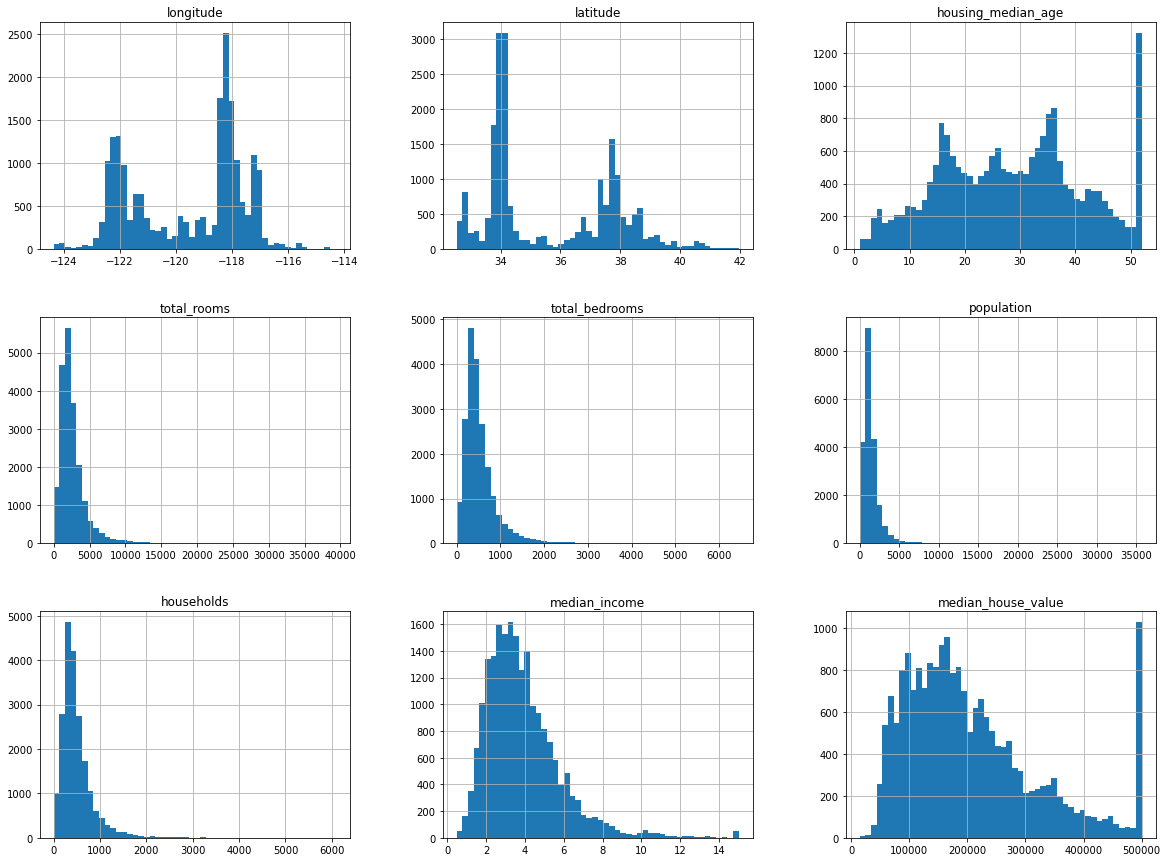

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

housing.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
#OK - now create a training data set

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state = 42)

print ("full dataset", housing.shape)
print ("train_set", train_set.shape)
print ("test set", test_set.shape)

full dataset (20640, 10)
train_set (16512, 10)
test set (4128, 10)


<AxesSubplot:>

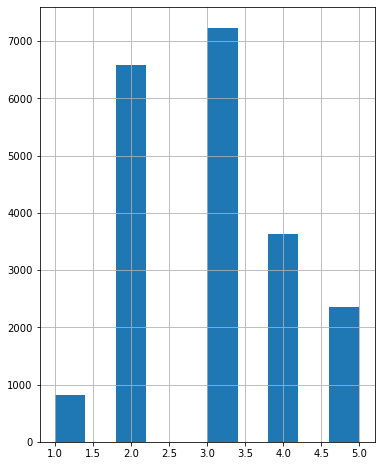

In [8]:
#An alternative way to cut up the data - stratified sampling

#Am not entirely sure what this strat_train/test_set stuff is really doing.  Oh well

housing['income_cat'] = pd.cut(housing['median_income'], bins = [0, 1.5, 3, 4.5, 6, np.inf], labels = [1,2,3,4,5])

housing['income_cat'].hist(figsize=(6,8))

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

print(strat_train_set.shape)
print(strat_test_set.shape)


(16512, 11)
(4128, 11)


In [10]:
#now, drop the income_cat column, it's done it's job

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

print(strat_train_set.shape)
print(strat_test_set.shape)


(16512, 10)
(4128, 10)


# Discovery and Visualisation of the data

In [11]:
#first off, take a copy of the training set we got out of the stratified sample
#So this is kinda stupid, because it kills off what was previously in the 'housing' variable
#but I can't be arsed renaming it all over the place.  This is what it's like in the book

In [12]:
housing = strat_train_set.copy()

In [13]:
print(housing.shape)

(16512, 10)


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

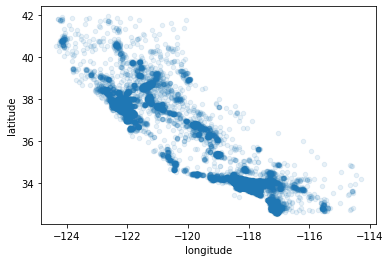

In [14]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)

#the alpha controls transparency - very useful, as it helps you to see how 'dense' data is on a chart

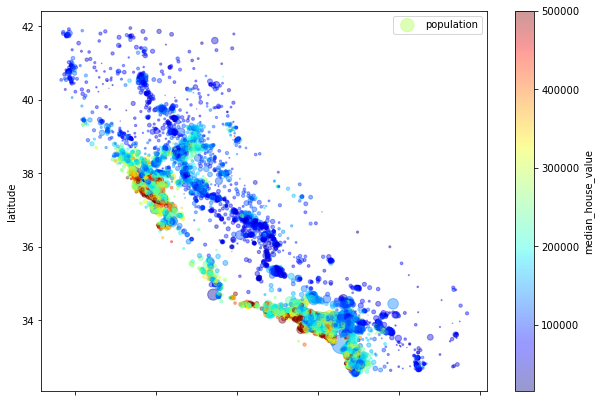

In [15]:
#Now make it look funkier

housing.plot(kind='scatter', x = 'longitude', y = 'latitude', alpha = 0.4, s= housing['population']/100, label = 'population', figsize=(10,7), c = 'median_house_value', cmap = plt.get_cmap("jet"), colorbar = True)

plt.legend()

In [16]:
#Correlations
corr_matrix = housing.corr()

<AxesSubplot:>

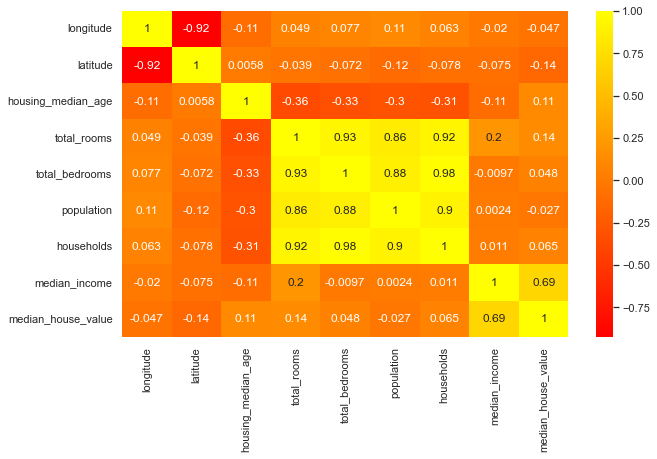

In [17]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(10,6)})
sns.heatmap(data = corr_matrix, annot = True, cmap = 'autumn') #just a random choice of cmap just for fun


In [18]:
#the raw data:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

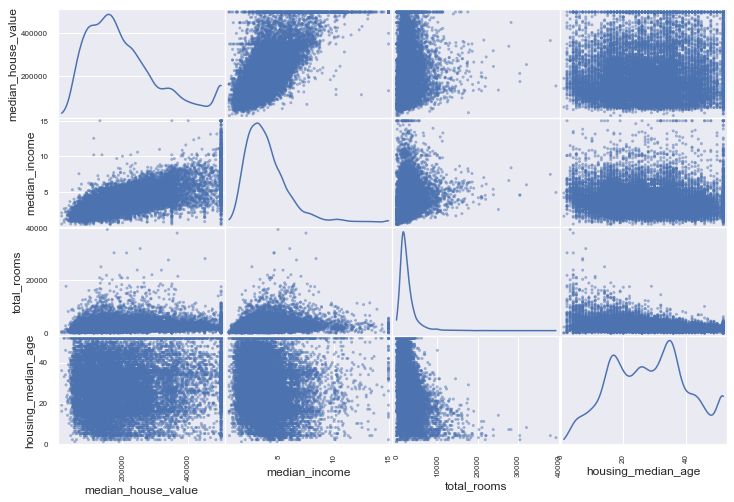

In [19]:
#yet another way to look at the correlation - as a scatter matrix
#here, provided for a subset only of all available combinations!

from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

scatter_matrix(housing[attributes], figsize=(12,8), diagonal='kde') #the last parameter decides what to show on the diagonals...

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

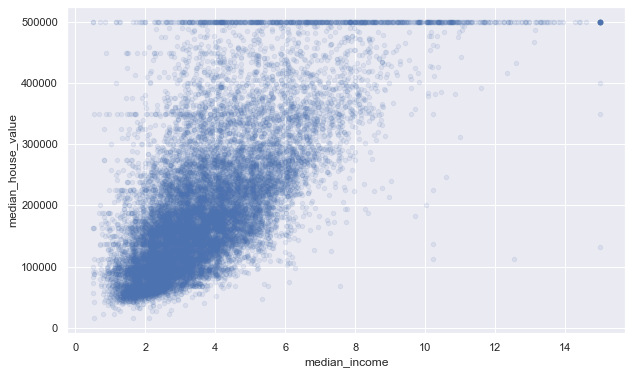

In [20]:
#It seems teh most promising one here is median_income - look at this in a little more detail

housing.plot(kind='scatter', x = 'median_income', y = 'median_house_value', alpha = 0.1)

#Note that you can see a few 'lines' here - one at 500k, one at about 350k
#these are issues with the inbound data - we would probably want to clean these up

In [21]:
#Let's play around with some of the data now, how the data behaves

housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='bedrooms_per_room', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='population_per_household', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='bedrooms_per_room', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='population_per_household', ylabel='rooms_per_household'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='bedrooms_per_room'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='bedrooms_per_room'>,
        <AxesSubplot:xlabel='bedrooms_per_room', ylabel='bedrooms_per_room'>,
        <AxesSubplot:xlabel='population_per_household', ylabel='bedrooms_per_room'>],
       [<AxesSubplo

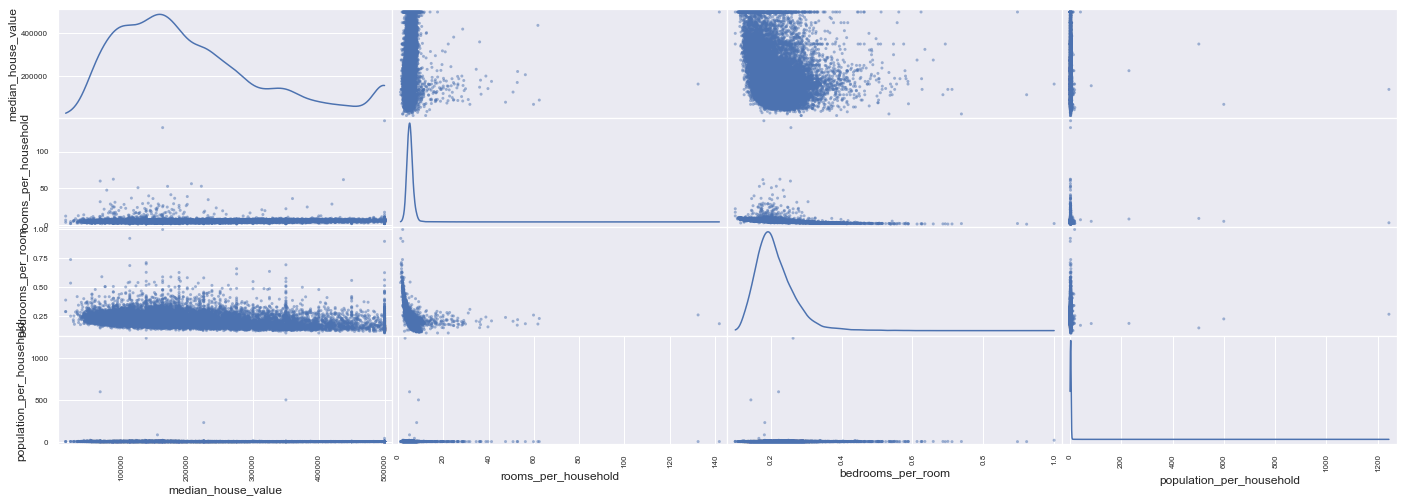

In [22]:
#Let's do another scatter matrix now, see what it looks like with these three new attrs

attributes = ['median_house_value', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

scatter_matrix(housing[attributes], figsize=(24,8), diagonal='kde') #the last parameter decides what to show on the diagonals...

In [23]:
#This doesn't tell a GREAT story - but if you look at the underlying correlations 
#between the new attrs, and what we have before, 
#it shows that they are more well correlated (/anticorrelated) than the previous ones were

corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

#So, at least they are better correlated

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

# Prepare the Data For Machine Learning Algorithms


In [24]:
#First off, start with a clean set of training data, 
#secondly drop the target label from the training set - we'll store that separately

housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [25]:
#First - total_bedrooms has missing data.  Sort that out

housing['total_bedrooms'].isnull().sum()



158

In [26]:
#We'll use a SimpleImputer.  Here, we'll tell it that its
#strategy should be to populate the missing values with the 
#median value of teh data set
#This makes things easier because later, when we have to do the same with the
#test set too, we want to use the same median, not the median of the test set
#so we can just use the same imputer instance, and it'll handle it automagically

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [27]:
#BUT you can only use it on numeric columns - so we need to create a dataframe with 
#only numeric cols...

housing_num = housing.drop('ocean_proximity', axis = 1)

housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [28]:
#now fit to the dataset
imputer.fit(housing_num)

print(imputer.statistics_)
print(housing_num.median().values)

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


In [29]:
#Now we've trained this imputer on (a copy of) the dataset
#now transform the original one
X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)

#There should now be no nulls:
housing_tr['total_bedrooms'].isnull().sum()

0

In [30]:
#Handling text and categorical attributes

housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [31]:
#encode this using the OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

print(housing_cat_encoded)

[[0.]
 [0.]
 [4.]
 ...
 [1.]
 [0.]
 [3.]]


In [32]:
#Let's look at the categories in the encoder
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [33]:
#See what happens when you use a OneHotEncoder instead:

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray() #because this ends up with a sparse matrix, need to call toArray() to make it look nice(r)

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

## Custom Transformer example (we won't be using this - it's just an example)

In [34]:
#Example small transformer class that jjust adds together a couple of atttributes

from sklearn.base import  BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder (BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room  = True): #note - no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y = None):
        return self #nothing else to do

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix]/ X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)

## Pipelines

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('immputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [36]:
## Column transformer - use this to transform both numeric, and categorical columns in one line

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

## Select and Train a model


### 1. Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [38]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions\t", lin_reg.predict(some_data_prepared).round(1))

print("Labels\t\t", list(some_labels))

Predictions	 [210644.6 317768.8 210956.4  59219.  189747.6]
Labels		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [39]:
#What is the root mean sqared error for this LinearRegression algorithm?
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [40]:
#Not very impressive - on average we're getting the prediction of housing median value
#wrong by $68k (on houses that often range between 120k and 265k)

In [41]:
#Try DecisionTreeRegressor instead
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

print("Predictions\t", tree_reg.predict(housing_prepared[:5]).round(1))

print("Labels\t\t", list(housing_labels[:5]))


Predictions	 [286600. 340600. 196900.  46300. 254500.]
Labels		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [42]:
#These are PERFECT matches - this is too good to be true

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [43]:
#As expected, rmse is zero - almost certainly due to over-fitting
#how can we be sure though - we don't want to touch the test dataset
#until we're confident the model actually works

#Here we'll use k-fold cross validation.  It's like it splits
#the training dataset in to a smaller training + validation set
#and evaluates against teh validation set instead

## Better evaluation Using Cross-Evaluation

In [44]:
#k-fold cross validation splits the training set in to x (here, 10)
#subsets called 'folds', then trains and evaluates the Decision Tree model
#10 times, picking a different fold for evaluation each time, and training
#on the other 9 folds
# You end up with an array storing 10 evaluation scores

In [45]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv = 10)

tree_rmse_scores = np.sqrt(-scores) 

#note we're taking the negative, because this is a UTILITY function (i.e. more is better)
#ratheer tahn a COST function (less is better)

In [46]:
def display_scores(scores):
    print('Scores:\t', *scores, sep='\n') #clever list unpacking thing i found on the web to print array line by line
    print('Mean:\t', scores.mean())
    print('Std Dev\t', scores.std())

display_scores(tree_rmse_scores)

Scores:	
68700.86422274158
67423.95046127062
69318.2137650548
68850.63011526421
71384.2262862912
74921.64485973454
71415.31081000518
70206.2425282179
77373.55699402302
70481.68836450847
Mean:	 71007.63284071116
Std Dev	 2876.492774369954


In [47]:
#Compare this with the earlier Linear Regression model.  This one (decision tree) has
#a Mean (i.e. the score) of 71209.  The Linear Regression one had an rmse score of 68628
#So Linear Regression was actually better...

#Just to be sure, calculate the same thing (i.e. using cross validation) for Linear Regression
#to ensure we aren't comparing apples and orages:

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:	
66782.73843989319
66960.1180710006
70347.95244419388
74739.5705255179
68031.13388937665
71193.84183425657
64969.63056405337
68281.61137997016
71552.91566557655
67665.10082066947
Mean:	 69052.46136345083
Std Dev	 2731.674001798345


In [48]:
#Confirmed - 
#Decision Tree Mean: 71209.5211824211
#Linear Regression Mean: 69052.46136345083

In [49]:
#Now try one furhter model - the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores:	
49570.868405461726
47960.02741362054
50386.80871814403
52166.88402329961
49639.89063196161
53629.196441867345
48642.344995623906
48019.06590837208
52820.238704412164
50476.28122631115
Mean:	 50331.16064690742
Std Dev	 1879.963787049268


In [50]:
#Much better!  Mean 50246

## Fine Tune the Model - tune the hyperparameters

### 1. Gridsearch

In [51]:
#Just tell GridSearchCV which hyperparameters to tune, and it does it automatically!

from sklearn.model_selection import GridSearchCV

param_grid = [
    { 'n_estimators': [3,10,30], 'max_features': [2, 4, 6, 8], 'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring = 'neg_mean_squared_error', return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [52]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [53]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=10)

In [54]:
#and look at the scores:
cvres = grid_search.cv_results_

for mean_score , params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63043.890508269134 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54234.100032187256 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60297.73498804069 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52544.3311650866 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
59173.260003216834 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
51829.13021897233 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


## Feature Importances in the RandomForestRegressor (and others?)

In [55]:
feature_importances = grid_search.best_estimator_.feature_importances_

print(feature_importances)

[8.77633347e-02 7.69250556e-02 3.90888609e-02 2.24813622e-02
 1.88144668e-02 2.48156105e-02 1.95157643e-02 2.44009403e-01
 4.04560791e-02 8.97160822e-02 1.52619596e-01 2.23084747e-02
 1.49473675e-01 2.18246798e-05 2.67194870e-03 9.31846202e-03]


In [56]:
#a little code to present these, alongside their associated attribute names:

#####NOTE!!!!  This doesn't work like it did in the textbook - so be careful

extra_attribs= ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories[0])

attributes = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse = True)

[(0.24400940297208598, 'median_income'),
 (0.15261959558396027, 'bedrooms_per_room'),
 (0.08971608220506799, 'pop_per_hhold'),
 (0.08776333469109661, 'longitude'),
 (0.0769250556473742, 'latitude'),
 (0.04045607907077407, 'rooms_per_hhold'),
 (0.03908886094102805, 'housing_median_age'),
 (0.0248156104810893, 'population'),
 (0.022481362226877626, 'total_rooms'),
 (0.022308474690372997, 'a'),
 (0.019515764313061245, 'households'),
 (0.01881446675949307, 'total_bedrooms')]

## Evaluate Model on a test set

In [57]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict (X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)

final_rmse = np.sqrt(final_mse)

print(final_rmse)

49946.855991531986


In [60]:
#In some cases, a single point estimate of the error might not be enough to 
#convince you that tthe model is good.  Here, you can also look at the 95% confidence interval perhaps:

from scipy import stats

confidence = 0.95

squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
    loc=squared_errors.mean(),
    scale = stats.sem(squared_errors)
))

array([47925.3927348 , 51889.62881051])